<h1> Probabilidade de presença no segundo dia de ENEM </h1>

Nesta aplicação utilizaremos os dados do [ENEM 2016](https://www.kaggle.com/gbonesso/enem-2016/version/2) para prever alguns aspectos. <br>

<h1> Pré-processamento </h1>

In [1]:
import pandas as pd

In [28]:
columns = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH']

In [34]:
data2 = pd.read_csv("microdados_enem_2016_coma.csv", usecols = columns)

In [32]:
data2['TP_PRESENCA_CN'].value_counts()

1     4302366
0     2103268
1     1693051
0      517868
MT       3960
2        2844
GO       2705
2         860
DF         41
PA          8
MG          6
SP          5
MS          4
MA          2
RJ          1
TO          1
PR          1
BA          1
RO          1
SC          1
Name: TP_PRESENCA_CN, dtype: int64

In [35]:
column_names = ['CO_UF_ESC','TP_ESCOLA','TP_ANO_CONCLUIU','IN_TREINEIRO','TP_PRESENCA_LC', 'TP_PRESENCA_MT']

In [3]:
data = pd.read_csv("microdados_enem_2016_coma.csv", usecols = column_names)

In [27]:
data.tail()

,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_UF_ESC,TP_PRESENCA_LC,TP_PRESENCA_MT
8627362,0,2,0,50.0,1.0,1.0
8627363,0,2,0,53.0,0.0,0.0
8627364,0,1,1,0.0,1.0,1.0
8627365,0,2,0,35.0,1.0,1.0
8627366,0,1,1,0.0,1.0,1.0


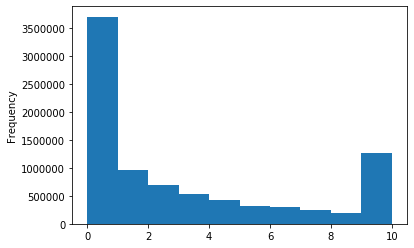

In [26]:
import matplotlib
data['TP_ANO_CONCLUIU'].plot(kind='hist')

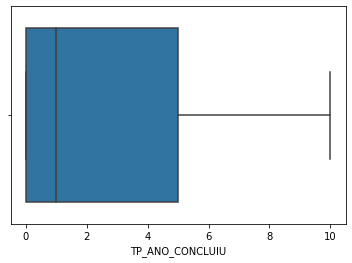

In [6]:
import seaborn as sns
sns.boxplot(data['TP_ANO_CONCLUIU'])

In [7]:
data.isnull().sum()

TP_ANO_CONCLUIU          0
TP_ESCOLA                0
IN_TREINEIRO             0
CO_UF_ESC          6746085
TP_PRESENCA_LC         374
TP_PRESENCA_MT         374
dtype: int64

In [8]:
data['CO_UF_ESC'] = data['CO_UF_ESC'].fillna(0)

In [9]:
data = data.dropna()

In [10]:
data.dtypes

TP_ANO_CONCLUIU      int64
TP_ESCOLA            int64
IN_TREINEIRO         int64
CO_UF_ESC          float64
TP_PRESENCA_LC     float64
TP_PRESENCA_MT     float64
dtype: object

In [11]:
data['TP_ANO_CONCLUIU'].value_counts()
#ano de conclusao: 0 não informado, 1 2015, decrescendo até 9 2007, 10 anterior a 2007

0     3698932
10    1083843
1      966817
2      699968
3      527292
4      416439
5      317357
6      294205
7      244449
8      199606
9      178085
Name: TP_ANO_CONCLUIU, dtype: int64

In [12]:
data['TP_ESCOLA'].value_counts()
#1 n respondeu, 2 publica, 3 privada, 4 exterior

1    6744768
2    1561829
3     319411
4        985
Name: TP_ESCOLA, dtype: int64

In [13]:
data['IN_TREINEIRO'].value_counts()
#1 sim, 0 nao

0    7608070
1    1018923
Name: IN_TREINEIRO, dtype: int64

In [14]:
data['CO_UF_ESC'].value_counts()

0.0     6745762
35.0     409034
31.0     181997
33.0     128395
23.0     123410
41.0     108487
29.0     108269
43.0      87515
26.0      84288
15.0      78987
42.0      64735
52.0      64194
21.0      62509
13.0      41503
32.0      39414
53.0      35310
22.0      35112
25.0      33239
51.0      32685
24.0      28616
50.0      26843
27.0      25597
28.0      19311
11.0      18924
17.0      16403
16.0      11172
12.0      10100
14.0       5182
Name: CO_UF_ESC, dtype: int64

In [15]:
data['TP_PRESENCA_LC'].value_counts()
#0 faltou, 1 presente, 2 eliminado

1.0    5845155
0.0    2777204
2.0       4634
Name: TP_PRESENCA_LC, dtype: int64

In [16]:
data['TP_PRESENCA_MT'].value_counts()
#0 faltou, 1 presente, 2 eliminado

1.0    5844971
0.0    2777393
2.0       4629
Name: TP_PRESENCA_MT, dtype: int64

In [17]:
data.isnull().sum()

TP_ANO_CONCLUIU    0
TP_ESCOLA          0
IN_TREINEIRO       0
CO_UF_ESC          0
TP_PRESENCA_LC     0
TP_PRESENCA_MT     0
dtype: int64

In [18]:
train_dataset = data.sample(frac=0.75,random_state=0) #the random_state gives the seed for the randomization 
test_dataset = data.drop(train_dataset.index)

In [19]:
train_labels = train_dataset.pop('TP_PRESENCA_MT')
test_labels = test_dataset.pop('TP_PRESENCA_MT')

In [20]:
from sklearn.naive_bayes import GaussianNB

modelB = GaussianNB().fit(train_dataset, train_labels) 

In [21]:
predicted_label = modelB.predict(test_dataset)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(test_labels, predicted_label) 
print (accuracy_score)

0.9999754259653887


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [24]:
labels = list(set(test_labels))
df_GNB = pd.DataFrame(
    data  = confusion_matrix(test_labels, predicted_label, labels=labels),
    columns=labels,
    index=labels
)
df_GNB

,0.0,1.0,2.0
0.0,695112,47,0
1.0,4,1460421,2
2.0,0,0,1162


In [25]:
print(classification_report(test_labels, predicted_label, digits=4))

              precision    recall  f1-score   support

         0.0     1.0000    0.9999    1.0000    695159
         1.0     1.0000    1.0000    1.0000   1460427
         2.0     0.9983    1.0000    0.9991      1162

    accuracy                         1.0000   2156748
   macro avg     0.9994    1.0000    0.9997   2156748
weighted avg     1.0000    1.0000    1.0000   2156748



In [47]:
data.describe()

,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_UF_ESC,TP_PRESENCA_LC,TP_PRESENCA_MT
count,8.626993e+06,8.626993e+06,8.626993e+06,8.626993e+06,8.626993e+06,8.626993e+06
mean,2.864913e+00,1.255432e+00,1.181087e-01,6.977319e+00,6.786169e-01,6.785944e-01
std,3.578180e+00,5.147043e-01,3.227368e-01,1.397768e+01,4.681563e-01,4.681637e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,1.000000e+01,4.000000e+00,1.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00
